In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/m_health_dataset.csv')

df.shape

(233891, 17)

In [4]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,Maybe,Maybe,High,No,Yes,Maybe,No,No
1,8/27/2014 15:35,Male,United States,Housewife,No,No,No,More than 2 months,No,Yes,Yes,Medium,No,Maybe,Maybe,No,No
2,8/27/2014 15:34,Male,United Kingdom,Business,No,Yes,Yes,Go out Every day,No,Yes,No,Medium,Yes,Yes,Maybe,No,No
3,8/29/2014 11:36,Male,United States,Student,No,No,No,15-30 days,No,Yes,Maybe,High,No,No,No,No,Not sure
4,8/27/2014 12:43,Male,United States,Student,No,Yes,Yes,31-60 days,No,Maybe,Maybe,High,No,No,Maybe,No,Not sure


In [5]:
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"There are {duplicate_rows} duplicate rows in the DataFrame.")
    display(df[df.duplicated(keep=False)])
else:
    print("There are no duplicate rows in the DataFrame.")

There are 1498 duplicate rows in the DataFrame.


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
150,10/2/2014 21:25,Female,United States,Student,No,Yes,Yes,More than 2 months,Yes,Maybe,Maybe,High,No,Maybe,No,No,Not sure
393,8/27/2014 14:52,Female,Sweden,Corporate,No,Yes,No,31-60 days,No,No,Maybe,High,No,No,Maybe,No,Yes
426,8/29/2014 12:54,Female,United States,Student,No,No,Yes,More than 2 months,Yes,Maybe,Maybe,High,No,Maybe,No,No,No
459,8/27/2014 12:39,Male,United States,Business,No,No,No,1-14 days,Maybe,Maybe,No,Medium,Yes,No,No,No,No
504,8/29/2014 11:11,Female,United States,Corporate,No,No,No,31-60 days,No,No,Maybe,High,No,No,Maybe,No,Not sure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233630,8/27/2014 12:33,Male,United States,Student,No,No,No,15-30 days,Maybe,Yes,Yes,Medium,No,Yes,Maybe,No,No
233754,8/27/2014 14:31,Female,United States,Others,No,No,No,31-60 days,Yes,Maybe,Yes,High,Yes,Yes,No,No,Yes
233768,8/27/2014 12:42,Male,United States,Business,No,Yes,Yes,More than 2 months,Maybe,Yes,Yes,Medium,Yes,No,No,No,No
233862,8/28/2014 18:21,Female,United Kingdom,Others,No,Yes,Yes,31-60 days,Yes,Maybe,Yes,High,Yes,Yes,No,No,No


In [6]:
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"DataFrame shape after removing duplicates: {df.shape}")
else:
    print('No duplicates to remove')

DataFrame shape after removing duplicates: (232393, 17)


In [7]:
columns_to_drop = [ 'mental_health_interview','Timestamp'] 
df = df.drop(columns=columns_to_drop)

print(f"Columns removed. New DataFrame shape: {df.shape}")

Columns removed. New DataFrame shape: (232393, 15)


In [8]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,care_options
0,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,Maybe,Maybe,High,No,Yes,Maybe,No
1,Male,United States,Housewife,No,No,No,More than 2 months,No,Yes,Yes,Medium,No,Maybe,Maybe,No
2,Male,United Kingdom,Business,No,Yes,Yes,Go out Every day,No,Yes,No,Medium,Yes,Yes,Maybe,No
3,Male,United States,Student,No,No,No,15-30 days,No,Yes,Maybe,High,No,No,No,Not sure
4,Male,United States,Student,No,Yes,Yes,31-60 days,No,Maybe,Maybe,High,No,No,Maybe,Not sure


In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Gender':
['Female' 'Male']

Unique values in column 'Country':
['United States' 'United Kingdom' 'Belgium' 'New Zealand' 'Netherlands'
 'Ireland' 'Sweden' 'Canada' 'Australia' 'South Africa' 'Philippines'
 'Brazil' 'Germany' 'Moldova' 'Switzerland' 'Denmark' 'France' 'Finland'
 'Nigeria' 'Israel' 'Georgia' 'Italy' 'Bosnia and Herzegovina'
 'Costa Rica' 'Singapore' 'Greece' 'Croatia' 'India' 'Thailand' 'Russia'
 'Poland' 'Mexico' 'Portugal' 'Colombia' 'Czech Republic']

Unique values in column 'Occupation':
['Corporate' 'Housewife' 'Business' 'Student' 'Others']

Unique values in column 'self_employed':
[nan 'No' 'Yes']

Unique values in column 'family_history':
['Yes' 'No']

Unique values in column 'treatment':
['Yes' 'No']

Unique values in column 'Days_Indoors':
['1-14 days' 'More than 2 months' 'Go out Every day' '15-30 days'
 '31-60 days']

Unique values in column 'Growing_Stress':
['Yes' 'No' 'Maybe']

Unique values in column 'Changes_Habits':
['Maybe' 'Ye

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232393 entries, 0 to 233890
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Gender                 232393 non-null  object
 1   Country                232393 non-null  object
 2   Occupation             232393 non-null  object
 3   self_employed          228221 non-null  object
 4   family_history         232393 non-null  object
 5   treatment              232393 non-null  object
 6   Days_Indoors           232393 non-null  object
 7   Growing_Stress         232393 non-null  object
 8   Changes_Habits         232393 non-null  object
 9   Mental_Health_History  232393 non-null  object
 10  Mood_Swings            232393 non-null  object
 11  Coping_Struggles       232393 non-null  object
 12  Work_Interest          232393 non-null  object
 13  Social_Weakness        232393 non-null  object
 14  care_options           232393 non-null  object
dtypes: ob

In [11]:
df.isna().sum()

Gender                      0
Country                     0
Occupation                  0
self_employed            4172
family_history              0
treatment                   0
Days_Indoors                0
Growing_Stress              0
Changes_Habits              0
Mental_Health_History       0
Mood_Swings                 0
Coping_Struggles            0
Work_Interest               0
Social_Weakness             0
care_options                0
dtype: int64

In [12]:
df.dropna(inplace=True)
print(f"DataFrame shape after dropping rows with NaN values: {df.shape}")

DataFrame shape after dropping rows with NaN values: (228221, 15)


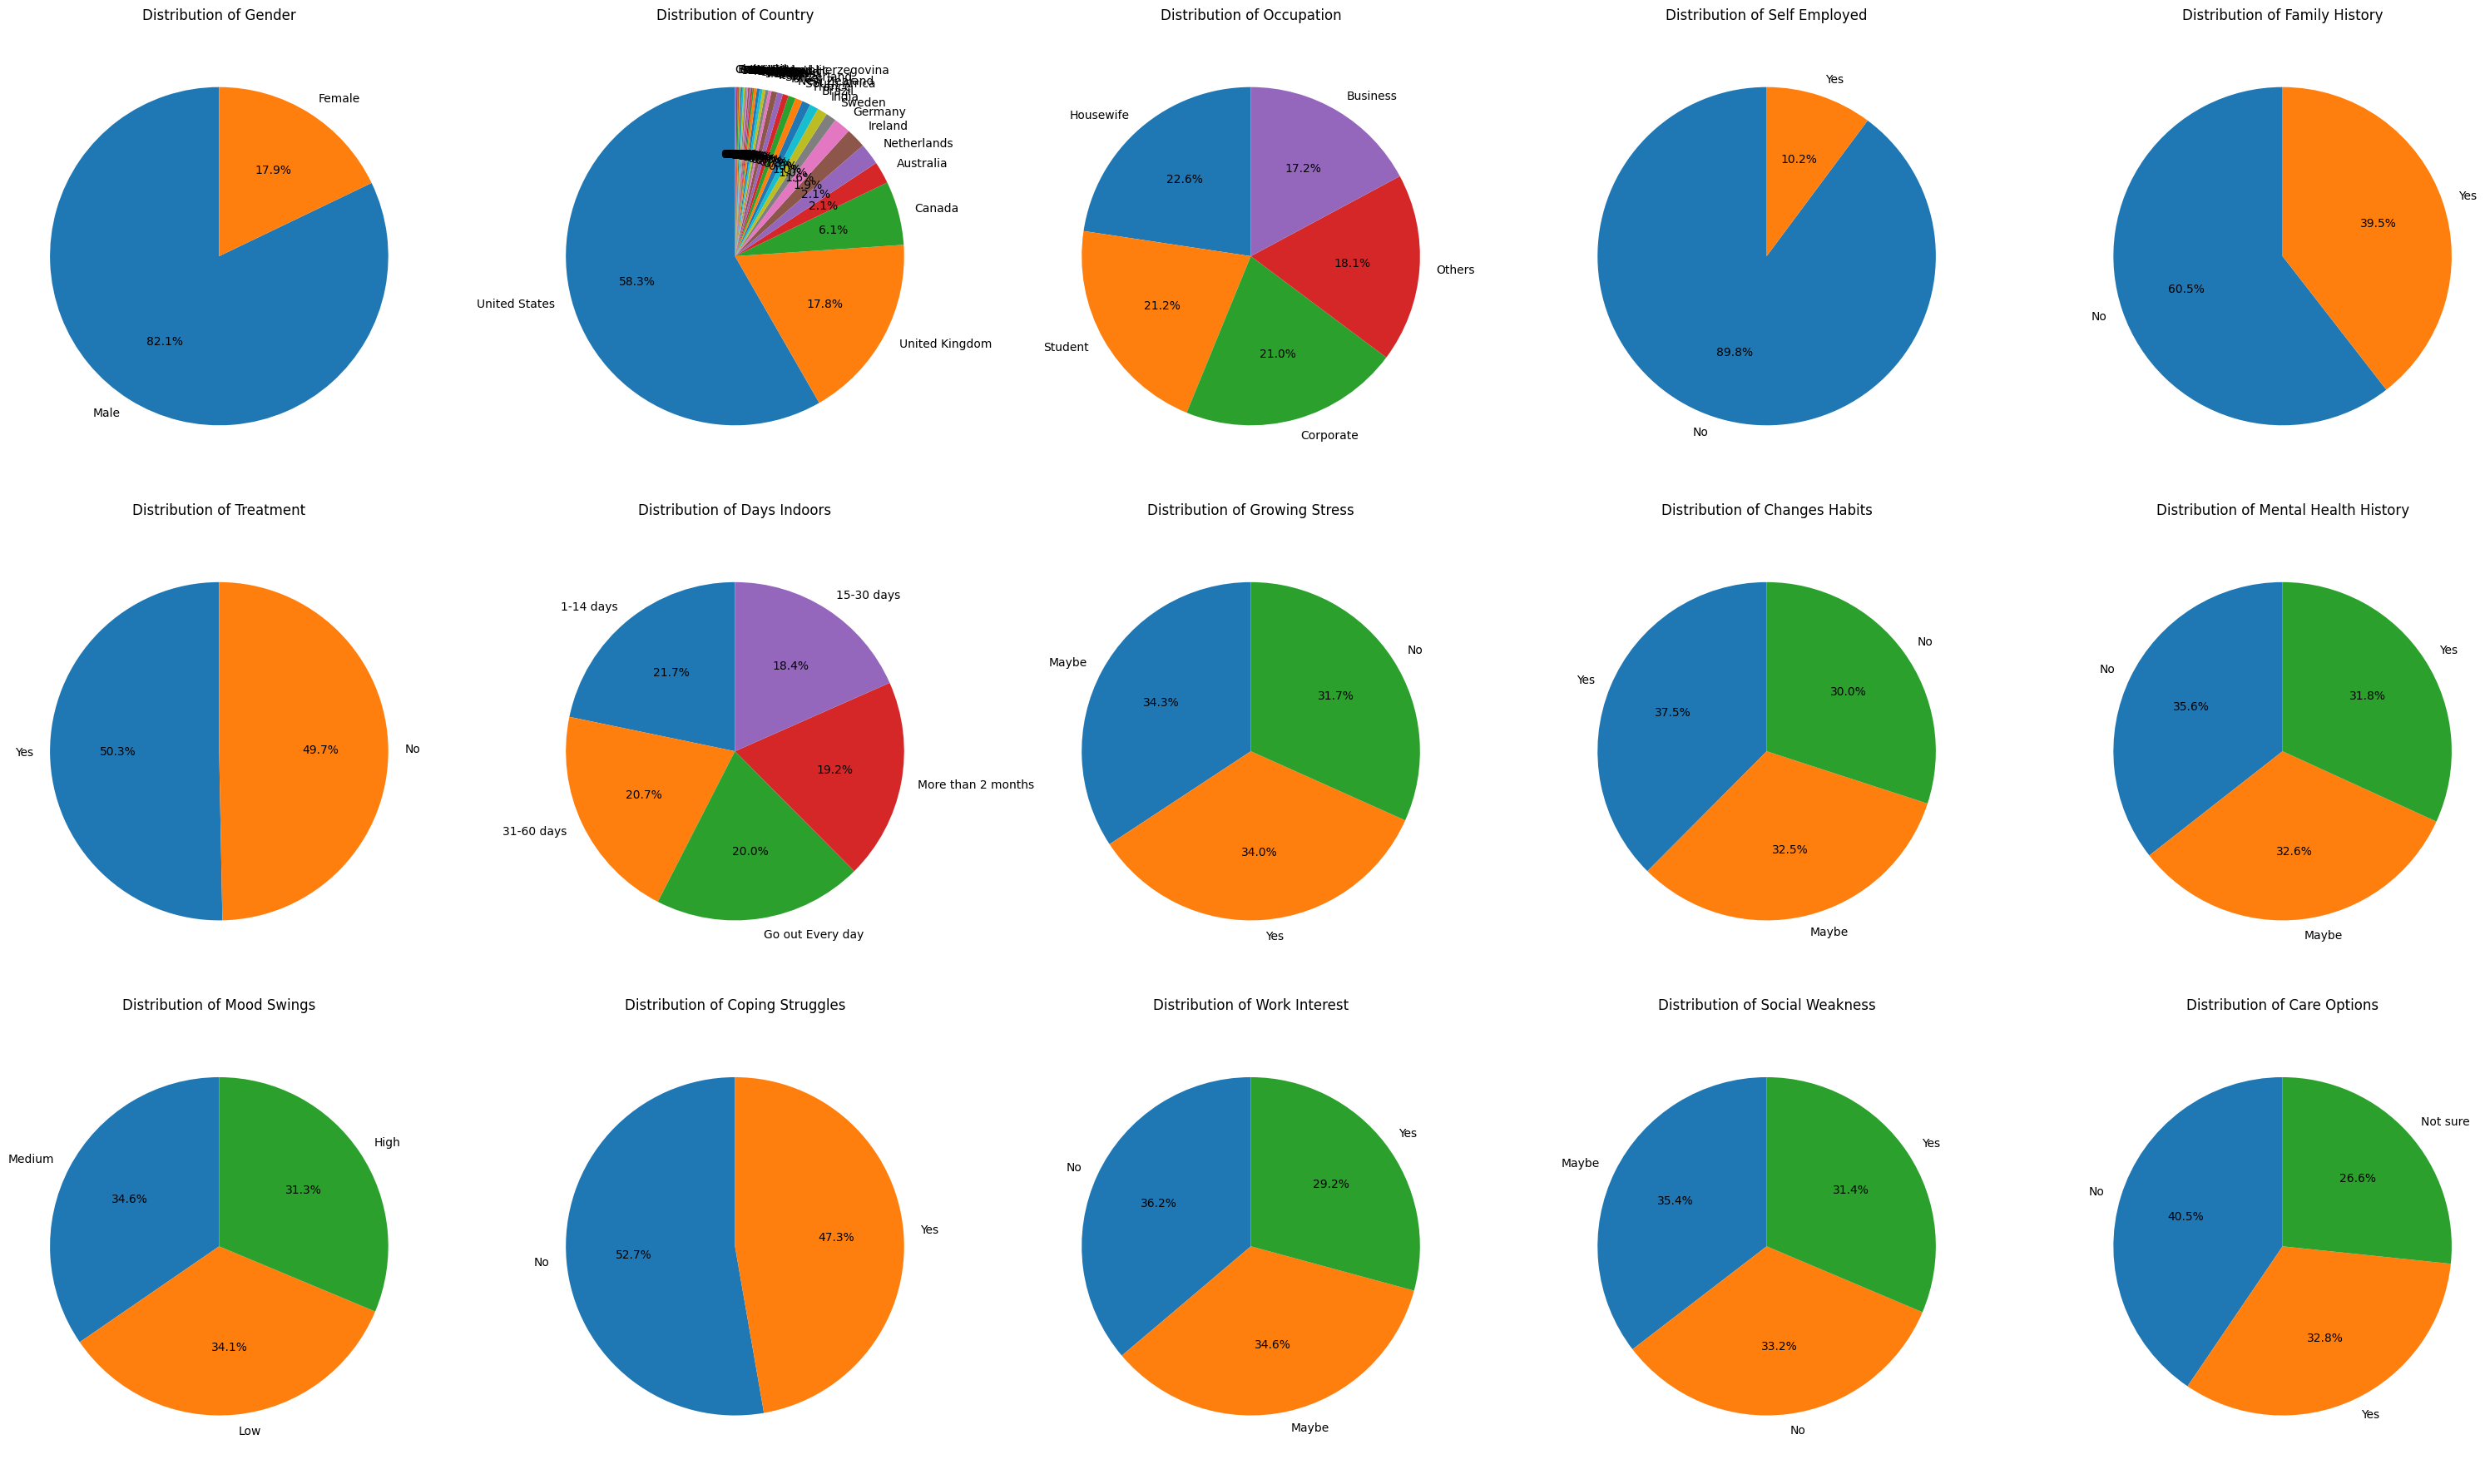

In [15]:
categorical_columns = df.select_dtypes(include="object").columns

# Determine the number of subplots needed based on user request (2 rows, 5 columns)
num_plots = len(categorical_columns)
num_rows = int(np.ceil(num_plots / 5))
num_cols = 5

#num_plots_to_show = min(num_plots, num_rows * num_cols)

plt.figure(figsize=(num_cols * 6, num_rows * 6)) # Adjust figure size dynamically for 2 rows

for i, column in enumerate(categorical_columns): # Iterate only through the first 10 columns
    plt.subplot(num_rows, num_cols, i + 1) # Create subplot in a 2x5 grid
    counts = df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    plt.title(f'Distribution of {column.replace("_", " ").title()}', fontsize=12)
    plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

plt.savefig('../img/distribution_piecharts.png')

plt.show()



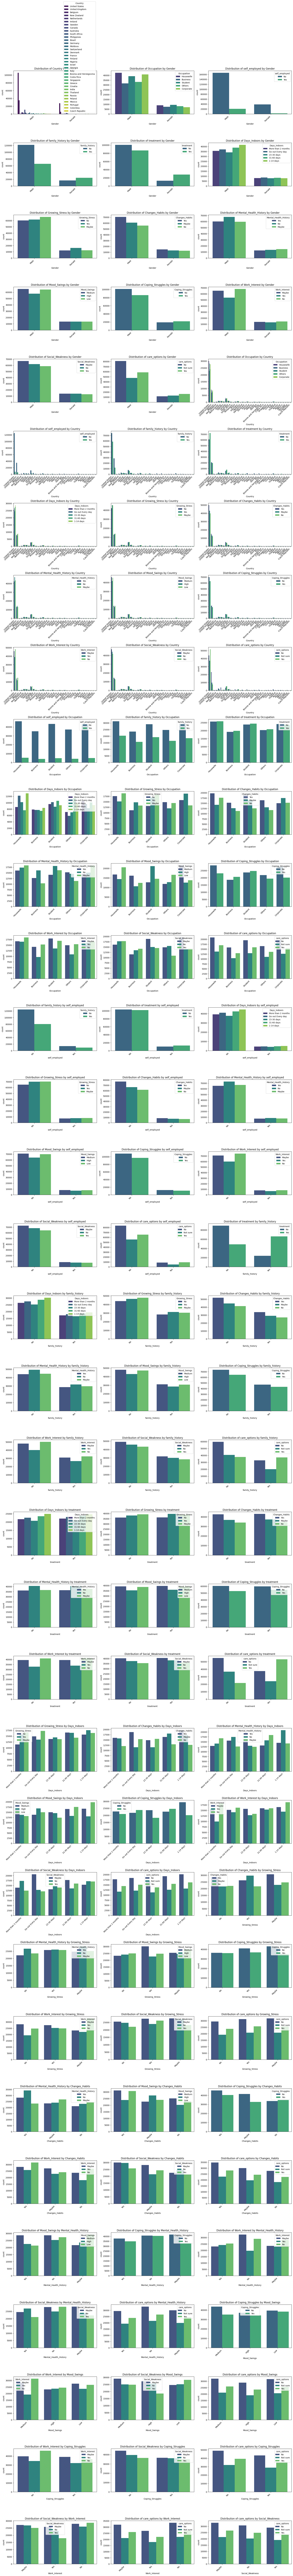

In [18]:
import itertools
import math

independent_categorical_columns = df.columns.tolist()

# Create an empty list to store all unique pairs of columns
column_pairs = []

# Use itertools.combinations to generate all unique pairs of columns
for pair in itertools.combinations(independent_categorical_columns, 2):
    column_pairs.append(pair)

# Calculate the number of rows and columns needed for the subplot grid
# Aim for a maximum of 3 plots per row
num_plots = len(column_pairs)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

# Create a figure and a set of subplots
plt.figure(figsize=(20, 5 * num_rows))

# Iterate through each (col1, col2) pair in column_pairs and generate a bar plot
for i, (col1, col2) in enumerate(column_pairs):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df, x=col1, hue=col2, palette='viridis')
    plt.title(f'Distribution of {col2} by {col1}')
    plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

plt.savefig('../img/pairwise_barplots.png')

plt.show()